#Building the Model

In this notebook, we explore the different model architectures which we can use for our task.

In [43]:
import pandas as pd

df = pd.read_csv('/content/final_dataset (1).csv')

In [29]:
df.head(10)

,date,Crude Oil Prices: Brent - Europe,sentiment,Closing Coal Prices,global_clean_index,production volume in industry,EU Natural Gas Prices,"Price Index for Consumer: Energy(electricity, heat, fuel)",euro_stoxx,ecb_interest_rate,...,euro_stoxx_lag1,"Price Index for Consumer: Energy(electricity, heat, fuel) _lag2",Crude Oil Prices: Brent - Europe_lag2,euro_stoxx_lag2,"Price Index for Consumer: Energy(electricity, heat, fuel) _lag3",Crude Oil Prices: Brent - Europe_lag3,euro_stoxx_lag3,label_lag1,label_lag2,label_lag3
0,4/19/2015,61.31,0.000000,59.95,800.15,95.620000,7.378000,99.792000,3674.05,0.05,...,3751.72,99.842667,59.32,3803.55,99.855333,57.69,3784.53,7.13,6.84,6.87
1,4/20/2015,61.20,0.000000,59.90,792.32,95.643333,7.377333,99.779333,3718.04,0.05,...,3674.05,99.830000,60.13,3751.72,99.842667,59.32,3803.55,7.08,7.13,6.84
2,4/21/2015,60.12,0.868889,59.75,798.27,95.666667,7.376667,99.766667,3719.38,0.05,...,3718.04,99.792000,61.31,3674.05,99.830000,60.13,3751.72,7.09,7.08,7.13
3,4/22/2015,60.12,0.000000,59.55,804.44,95.690000,7.376000,99.754000,3724.49,0.05,...,3719.38,99.779333,61.20,3718.04,99.792000,61.31,3674.05,7.25,7.09,7.08
4,4/23/2015,62.66,0.000000,59.60,812.45,95.713333,7.375333,99.741333,3697.88,0.05,...,3724.49,99.766667,60.12,3719.38,99.779333,61.20,3718.04,7.28,7.25,7.09
5,4/26/2015,62.96,0.000000,59.00,807.43,95.783333,7.373333,99.703333,3713.96,0.05,...,3697.88,99.754000,60.12,3724.49,99.766667,60.12,3719.38,7.15,7.28,7.25
6,4/27/2015,62.86,0.000000,59.40,808.38,95.806667,7.372667,99.690667,3771.45,0.05,...,3713.96,99.741333,62.66,3697.88,99.754000,60.12,3724.49,7.35,7.15,7.28
7,4/28/2015,62.61,0.737140,59.40,812.30,95.830000,7.372000,99.678000,3715.42,0.05,...,3771.45,99.703333,62.96,3713.96,99.741333,62.66,3697.88,7.46,7.35,7.15
8,4/29/2015,63.97,-0.791000,59.95,802.81,95.853333,7.371333,99.665333,3617.11,0.05,...,3715.42,99.690667,62.86,3771.45,99.703333,62.96,3713.96,7.39,7.46,7.35
9,4/30/2015,63.90,-0.974790,59.80,795.01,95.876667,7.370667,99.652667,3615.59,0.05,...,3617.11,99.678000,62.61,3715.42,99.690667,62.86,3771.45,7.48,7.39,7.46


## Approach 1: TabNet

Even though this isn’t classic time series forecasting, it's still time-dependent supervised learning because the targets and features have temporal structure. Lagging features become very important in this case since they carry  temporal information for predicting carbon prices.

To ensure no data from the future is leaked wherein the model might see future data points in training that appear before their corresponding targets in the test set. We used the last 30% of the data for testing, preserving chronological order.

The result of this pipeline is not a traditional time series, but still a temporally structured regression nontheless.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df_clean = df.drop(columns=['date'])
df_clean.head(10)

,Crude Oil Prices: Brent - Europe,sentiment,Closing Coal Prices,global_clean_index,production volume in industry,EU Natural Gas Prices,"Price Index for Consumer: Energy(electricity, heat, fuel)",euro_stoxx,ecb_interest_rate,label,...,euro_stoxx_lag1,"Price Index for Consumer: Energy(electricity, heat, fuel) _lag2",Crude Oil Prices: Brent - Europe_lag2,euro_stoxx_lag2,"Price Index for Consumer: Energy(electricity, heat, fuel) _lag3",Crude Oil Prices: Brent - Europe_lag3,euro_stoxx_lag3,label_lag1,label_lag2,label_lag3
0,61.31,0.000000,59.95,800.15,95.620000,7.378000,99.792000,3674.05,0.05,7.08,...,3751.72,99.842667,59.32,3803.55,99.855333,57.69,3784.53,7.13,6.84,6.87
1,61.20,0.000000,59.90,792.32,95.643333,7.377333,99.779333,3718.04,0.05,7.09,...,3674.05,99.830000,60.13,3751.72,99.842667,59.32,3803.55,7.08,7.13,6.84
2,60.12,0.868889,59.75,798.27,95.666667,7.376667,99.766667,3719.38,0.05,7.25,...,3718.04,99.792000,61.31,3674.05,99.830000,60.13,3751.72,7.09,7.08,7.13
3,60.12,0.000000,59.55,804.44,95.690000,7.376000,99.754000,3724.49,0.05,7.28,...,3719.38,99.779333,61.20,3718.04,99.792000,61.31,3674.05,7.25,7.09,7.08
4,62.66,0.000000,59.60,812.45,95.713333,7.375333,99.741333,3697.88,0.05,7.15,...,3724.49,99.766667,60.12,3719.38,99.779333,61.20,3718.04,7.28,7.25,7.09
5,62.96,0.000000,59.00,807.43,95.783333,7.373333,99.703333,3713.96,0.05,7.35,...,3697.88,99.754000,60.12,3724.49,99.766667,60.12,3719.38,7.15,7.28,7.25
6,62.86,0.000000,59.40,808.38,95.806667,7.372667,99.690667,3771.45,0.05,7.46,...,3713.96,99.741333,62.66,3697.88,99.754000,60.12,3724.49,7.35,7.15,7.28
7,62.61,0.737140,59.40,812.30,95.830000,7.372000,99.678000,3715.42,0.05,7.39,...,3771.45,99.703333,62.96,3713.96,99.741333,62.66,3697.88,7.46,7.35,7.15
8,63.97,-0.791000,59.95,802.81,95.853333,7.371333,99.665333,3617.11,0.05,7.48,...,3715.42,99.690667,62.86,3771.45,99.703333,62.96,3713.96,7.39,7.46,7.35
9,63.90,-0.974790,59.80,795.01,95.876667,7.370667,99.652667,3615.59,0.05,7.58,...,3617.11,99.678000,62.61,3715.42,99.690667,62.86,3771.45,7.48,7.39,7.46


In [45]:

# === 2. Chronological Train/Val/Test Split ===
split_train = int(len(df_clean) * 0.8)
split_val = int(split_train * 0.85)

train_df = df_clean.iloc[:split_val]
val_df = df_clean.iloc[split_val:split_train]
test_df = df_clean.iloc[split_train:]

# === 3. Separate Features and Labels ===
target_col = 'label'
drop_cols = ['label','label_lag1', 'label_lag2', 'label_lag3']

X_train = train_df.drop(columns=drop_cols)
y_train = train_df[target_col]
X_val = val_df.drop(columns=drop_cols)
y_val = val_df[target_col]
X_test = test_df.drop(columns=drop_cols)
y_test = test_df[target_col]

# === 4. Normalize Features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [3]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [40]:
#mae
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
import torch

tabnet = TabNetRegressor()

tabnet.fit(
    X_train=X_train_scaled, y_train=y_train.values.reshape(-1, 1),
    eval_set=[(X_val_scaled, y_val.values.reshape(-1, 1))],
    eval_name=['val'], eval_metric=['rmse'],
    max_epochs=200, patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

tabnet_preds = tabnet.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 646.22889| val_rmse: 72.95361|  0:00:00s
epoch 1  | loss: 578.97488| val_rmse: 74.08104|  0:00:00s
epoch 2  | loss: 513.49118| val_rmse: 62.4689 |  0:00:00s
epoch 3  | loss: 447.48999| val_rmse: 56.76006|  0:00:00s
epoch 4  | loss: 382.12326| val_rmse: 48.54862|  0:00:00s
epoch 5  | loss: 325.19607| val_rmse: 39.91594|  0:00:00s
epoch 6  | loss: 273.04765| val_rmse: 34.51071|  0:00:00s
epoch 7  | loss: 228.65003| val_rmse: 29.90236|  0:00:00s
epoch 8  | loss: 184.65581| val_rmse: 26.8991 |  0:00:00s
epoch 9  | loss: 134.90886| val_rmse: 27.64336|  0:00:01s
epoch 10 | loss: 90.91899| val_rmse: 26.65868|  0:00:01s
epoch 11 | loss: 56.14189| val_rmse: 150.57702|  0:00:01s
epoch 12 | loss: 35.54269| val_rmse: 152.38656|  0:00:01s
epoch 13 | loss: 22.67658| val_rmse: 39.52266|  0:00:01s
epoch 14 | loss: 21.96973| val_rmse: 35.90621|  0:00:01s
epoch 15 | loss: 24.03405| val_rmse: 35.68504|  0:00:01s
epoch 16 | loss: 21.56802| val_rmse: 38.47771|  0:00:01s
epoch 17 | loss: 16

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluation
# Assuming tabnet_preds holds the model predictions
y_pred = tabnet_preds
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"MAE Score: {mae}")

RMSE: 20.256639417173332
R² Score: -3.266689441424589
MAE Score: 16.135917698984912


In [23]:
y_test

,label
1511,54.79
2206,69.24
291,4.70
540,5.43
777,17.25
...,...
825,26.66
1070,27.27
1304,28.99
1537,61.37


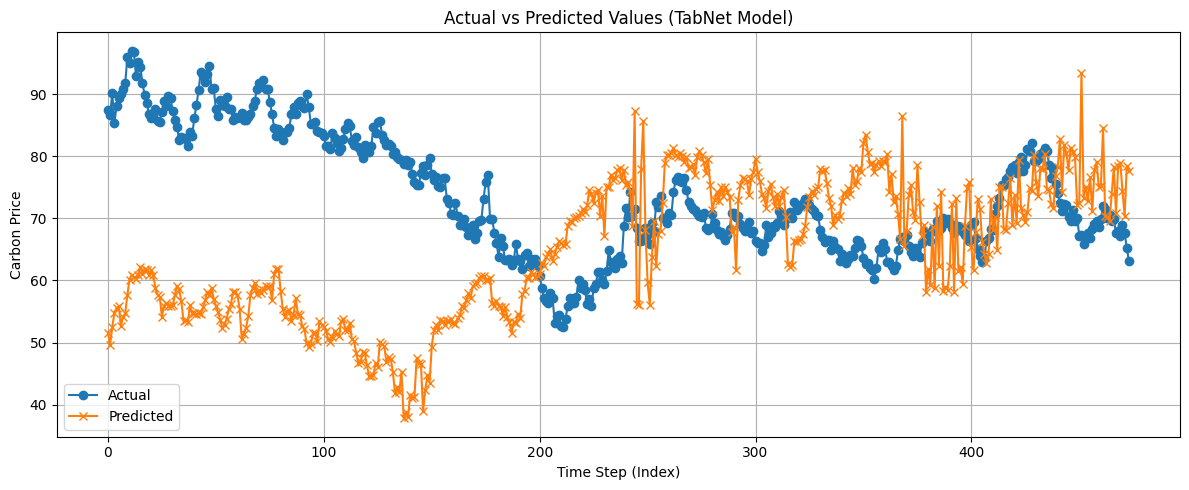

In [42]:
import matplotlib.pyplot as plt

# Define these variables based on your existing test data and predictions
true_values = y_test.reset_index(drop=True)
final_pred = tabnet_preds.flatten()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(true_values, label='Actual', marker='o')
plt.plot(final_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Values (TabNet Model)")
plt.xlabel("Time Step (Index)")
plt.ylabel("Carbon Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
tabnet.feature_importances_

array([4.13995300e-04, 3.14324358e-02, 6.16049583e-03, 1.38201496e-02,
       1.87771954e-02, 2.52701101e-01, 1.95893560e-02, 1.63230714e-01,
       1.21796383e-04, 5.14733854e-02, 5.61623298e-02, 4.84091713e-02,
       1.97945441e-03, 2.30310717e-02, 2.91646714e-02, 7.37044962e-02,
       1.83891065e-01, 2.59371145e-02])

Next, we aim to compare TabNet to an LSTM modelsince our data has a temporal/sequential component which LSTMs are designed to capture such patterns.

To carry this out we arbitrarily chose a sequence number number of 5 days worth of data and shaped our input data into sequences for the LSTM regressor.

In [46]:
import numpy as np

def create_sequences(features, labels, seq_len):
    X_seq, y_seq = [], []
    for i in range(seq_len, len(features)):
        X_seq.append(features[i-seq_len:i])     # seq_len rows ending at i-1
        y_seq.append(labels[i])                 # target is label at i
    return np.array(X_seq), np.array(y_seq)

# Choose sequence length (tunable)
SEQUENCE_LENGTH = 5

# Create sequences for train, val, test
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, SEQUENCE_LENGTH)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val.values, SEQUENCE_LENGTH)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, SEQUENCE_LENGTH)

min_required = SEQUENCE_LENGTH + 1
print("Train size OK?", len(X_train_scaled) >= min_required)
print("Val size OK?", len(X_val_scaled) >= min_required)
print("Test size OK?", len(X_test_scaled) >= min_required)


Train size OK? True
Val size OK? True
Test size OK? True


In [47]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to tensors
train_ds = TensorDataset(torch.tensor(X_train_seq, dtype=torch.float32),
                         torch.tensor(y_train_seq, dtype=torch.float32))
val_ds = TensorDataset(torch.tensor(X_val_seq, dtype=torch.float32),
                       torch.tensor(y_val_seq, dtype=torch.float32))
test_ds = TensorDataset(torch.tensor(X_test_seq, dtype=torch.float32),
                        torch.tensor(y_test_seq, dtype=torch.float32))

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)
test_loader = DataLoader(test_ds, batch_size=64)


In [48]:
import torch.nn as nn

class LSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_dim,
                            hidden_size=hidden_dim,
                            num_layers=num_layers,
                            dropout=dropout,
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)  # out: (batch, seq_len, hidden)
        last = out[:, -1, :]   # use output at last time step
        return self.fc(last)


To decide on the baseline LSTM resgressor architecture we resorted to carrying out a quick random grid search.

In [49]:
from sklearn.metrics import mean_squared_error
import itertools
import random
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameter grid
param_grid = {
    "hidden_dim": [32, 64, 128],
    "num_layers": [1, 2, 3, 4],
    "dropout": [0.0, 0.2, 0.3],
    "lr": [1e-3, 5e-4, 1e-4]
}
all_combos = list(itertools.product(*param_grid.values()))
sampled_combos = random.sample(all_combos, 30)

best_rmse = float("inf")
best_model = None
best_params = None

input_dim = X_train_seq.shape[2]

for i, (hd, nl, do, lr) in enumerate(sampled_combos):
    print(f"\n🔍 Config {i+1}: hidden={hd}, layers={nl}, dropout={do}, lr={lr}")
    model = LSTMRegressor(input_dim, hd, nl, do).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    # Training loop
    for epoch in range(30):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

    # Validation
    model.eval()
    val_preds = []
    with torch.no_grad():
        for xb, _ in val_loader:
            xb = xb.to(device)
            preds = model(xb).cpu().numpy()
            val_preds.extend(preds)

    rmse = mean_squared_error(y_val_seq, val_preds) ** 0.5
    print(f"📉 Validation RMSE: {rmse:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_params = (hd, nl, do, lr)
        torch.save(model.state_dict(), "best_lstm_model.pth")

print(f"\n✅ Best LSTM Config: hidden={best_params[0]}, layers={best_params[1]}, dropout={best_params[2]}, lr={best_params[3]}")
print(f"🏆 Best Validation RMSE: {best_rmse:.4f}")



🔍 Config 1: hidden=64, layers=2, dropout=0.2, lr=0.0005
📉 Validation RMSE: 59.2000

🔍 Config 2: hidden=64, layers=1, dropout=0.2, lr=0.0005


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


📉 Validation RMSE: 68.3456

🔍 Config 3: hidden=128, layers=3, dropout=0.0, lr=0.0001
📉 Validation RMSE: 67.5032

🔍 Config 4: hidden=32, layers=3, dropout=0.0, lr=0.001
📉 Validation RMSE: 58.7303

🔍 Config 5: hidden=32, layers=4, dropout=0.3, lr=0.0005
📉 Validation RMSE: 67.9399

🔍 Config 6: hidden=32, layers=3, dropout=0.2, lr=0.0005
📉 Validation RMSE: 67.7824

🔍 Config 7: hidden=128, layers=2, dropout=0.2, lr=0.0005
📉 Validation RMSE: 55.5000

🔍 Config 8: hidden=32, layers=1, dropout=0.2, lr=0.0005


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


📉 Validation RMSE: 73.5024

🔍 Config 9: hidden=128, layers=4, dropout=0.0, lr=0.0005
📉 Validation RMSE: 49.2438

🔍 Config 10: hidden=32, layers=1, dropout=0.2, lr=0.001


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


📉 Validation RMSE: 67.9267

🔍 Config 11: hidden=64, layers=4, dropout=0.3, lr=0.0005
📉 Validation RMSE: 62.2565

🔍 Config 12: hidden=32, layers=4, dropout=0.0, lr=0.0005
📉 Validation RMSE: 67.6687

🔍 Config 13: hidden=32, layers=3, dropout=0.0, lr=0.0001
📉 Validation RMSE: 76.8161

🔍 Config 14: hidden=128, layers=2, dropout=0.3, lr=0.0005
📉 Validation RMSE: 51.9819

🔍 Config 15: hidden=128, layers=4, dropout=0.0, lr=0.001
📉 Validation RMSE: 40.9735

🔍 Config 16: hidden=64, layers=3, dropout=0.0, lr=0.001
📉 Validation RMSE: 50.5047

🔍 Config 17: hidden=64, layers=2, dropout=0.3, lr=0.001
📉 Validation RMSE: 56.1749

🔍 Config 18: hidden=64, layers=4, dropout=0.2, lr=0.0005
📉 Validation RMSE: 58.8088

🔍 Config 19: hidden=128, layers=3, dropout=0.2, lr=0.0001
📉 Validation RMSE: 66.9488

🔍 Config 20: hidden=64, layers=2, dropout=0.0, lr=0.001
📉 Validation RMSE: 51.0923

🔍 Config 21: hidden=128, layers=2, dropout=0.0, lr=0.0005
📉 Validation RMSE: 50.8865

🔍 Config 22: hidden=128, layers=1, dr

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


📉 Validation RMSE: 52.7704

🔍 Config 23: hidden=32, layers=4, dropout=0.3, lr=0.001
📉 Validation RMSE: 64.5065

🔍 Config 24: hidden=64, layers=4, dropout=0.0, lr=0.0001
📉 Validation RMSE: 73.0784

🔍 Config 25: hidden=64, layers=3, dropout=0.3, lr=0.0005
📉 Validation RMSE: 59.6375

🔍 Config 26: hidden=64, layers=3, dropout=0.0, lr=0.0001
📉 Validation RMSE: 73.9809

🔍 Config 27: hidden=128, layers=4, dropout=0.3, lr=0.0005
📉 Validation RMSE: 52.0109

🔍 Config 28: hidden=128, layers=1, dropout=0.2, lr=0.0005


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


📉 Validation RMSE: 60.7035

🔍 Config 29: hidden=64, layers=1, dropout=0.3, lr=0.0005


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


📉 Validation RMSE: 68.4691

🔍 Config 30: hidden=32, layers=2, dropout=0.2, lr=0.0005
📉 Validation RMSE: 68.2842

✅ Best LSTM Config: hidden=128, layers=4, dropout=0.0, lr=0.001
🏆 Best Validation RMSE: 40.9735


In [50]:
X_combined = np.concatenate([X_train_seq, X_val_seq], axis=0)
y_combined = np.concatenate([y_train_seq, y_val_seq], axis=0)

combined_ds = TensorDataset(torch.tensor(X_combined, dtype=torch.float32),
                            torch.tensor(y_combined, dtype=torch.float32))
combined_loader = DataLoader(combined_ds, batch_size=64, shuffle=True)

hidden_dim, num_layers, dropout, lr = best_params
final_model = LSTMRegressor(input_dim, hidden_dim, num_layers, dropout).to(device)
optimizer = torch.optim.Adam(final_model.parameters(), lr=lr)
criterion = nn.MSELoss()

In [51]:
for epoch in range(30):
    final_model.train()
    for xb, yb in combined_loader:
        xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
        optimizer.zero_grad()
        preds = final_model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()


Next we compare LSTM performance, with same hyperparameters, excluding lagging features. It results in almost exactly the same performance, and still worse than TabNet

In [ ]:
import pandas as pd

df = pd.read_csv('/content/final_dataset (1).csv')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.sort_values(by='date')
df_clean = df.drop(columns=['date'])

# Chronological Train/Val/Test Split ===
split_train = int(len(df_clean) * 0.7)
split_val = int(split_train * 0.85)

train_df = df_clean.iloc[:split_val]
val_df = df_clean.iloc[split_val:split_train]
test_df = df_clean.iloc[split_train:]

# Drop all lag features and target
drop_cols = [col for col in df_clean.columns if 'lag' in col or col == 'label']
X_train = train_df.drop(columns=drop_cols)
y_train = train_df['label']  # Keep labels separate
X_val = val_df.drop(columns=drop_cols)
y_val = val_df['label']
X_test = test_df.drop(columns=drop_cols)
y_test = test_df['label']

# Normalize Features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import numpy as np

def create_sequences(features, labels, seq_len):
    X_seq, y_seq = [], []
    for i in range(seq_len, len(features)):
        X_seq.append(features[i-seq_len:i])     # seq_len rows ending at i-1
        y_seq.append(labels[i])                 # target is label at i
    return np.array(X_seq), np.array(y_seq)

# Choose sequence length (tunable)
SEQUENCE_LENGTH = 5

# Create sequences for train, val, test
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, SEQUENCE_LENGTH)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val.values, SEQUENCE_LENGTH)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, SEQUENCE_LENGTH)

min_required = SEQUENCE_LENGTH + 1
print("Train size OK?", len(X_train_scaled) >= min_required)
print("Val size OK?", len(X_val_scaled) >= min_required)
print("Test size OK?", len(X_test_scaled) >= min_required)


Train size OK? True
Val size OK? True
Test size OK? True


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to tensors
train_ds = TensorDataset(torch.tensor(X_train_seq, dtype=torch.float32),
                         torch.tensor(y_train_seq, dtype=torch.float32))
val_ds = TensorDataset(torch.tensor(X_val_seq, dtype=torch.float32),
                       torch.tensor(y_val_seq, dtype=torch.float32))
test_ds = TensorDataset(torch.tensor(X_test_seq, dtype=torch.float32),
                        torch.tensor(y_test_seq, dtype=torch.float32))

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)
test_loader = DataLoader(test_ds, batch_size=64)


In [ ]:
import torch.nn as nn

class LSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_dim,
                            hidden_size=hidden_dim,
                            num_layers=num_layers,
                            dropout=dropout,
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)  # out: (batch, seq_len, hidden)
        last = out[:, -1, :]   # use output at last time step
        return self.fc(last)


In [ ]:
from sklearn.metrics import mean_squared_error
import itertools
import random
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_combined = np.concatenate([X_train_seq, X_val_seq], axis=0)
y_combined = np.concatenate([y_train_seq, y_val_seq], axis=0)

combined_ds = TensorDataset(torch.tensor(X_combined, dtype=torch.float32),
                            torch.tensor(y_combined, dtype=torch.float32))
combined_loader = DataLoader(combined_ds, batch_size=64, shuffle=True)
input_dim = X_train_seq.shape[2]
hidden=128
layers=2
dropout=0.3
lr=0.001
final_model = LSTMRegressor(input_dim, hidden, layers, dropout).to(device)
optimizer = torch.optim.Adam(final_model.parameters(), lr=lr)
criterion = nn.MSELoss()

In [ ]:
for epoch in range(30):
    final_model.train()
    for xb, yb in combined_loader:
        xb, yb = xb.to(device), yb.to(device).unsqueeze(1)
        optimizer.zero_grad()
        preds = final_model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()


In [ ]:
final_model.eval()
test_preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        preds = final_model(xb).cpu().numpy()
        test_preds.extend(preds)

from sklearn.metrics import mean_squared_error, r2_score

lstm_rmse = np.sqrt(mean_squared_error(y_test_seq, test_preds))
lstm_r2 = r2_score(y_test_seq, test_preds)

print(f"Final Test RMSE (LSTM): {lstm_rmse:.4f}")
print(f"Final Test R² Score (LSTM): {lstm_r2:.4f}")

Final Test RMSE (LSTM): 15.5033
Final Test R² Score (LSTM): 0.7297
